# Logistic Regression

Logisitic Regression은 크게 <br>
- Sigmoid function을 이용한 Binary Classification
- Softmax function을 이용한 Multi Classification

...으로 나눌 수 있다.

## Binomial Logistic Regression

Binomial Logistic Regression에서는 Sigmoid function(= Logistic function)으로 Binary Classification을 한다.

Sigmoid function($\sigma = {1 \over {1 + \exp(-t)}}$)은 아래와 같은 모양을 가진다.

### Shape of Model

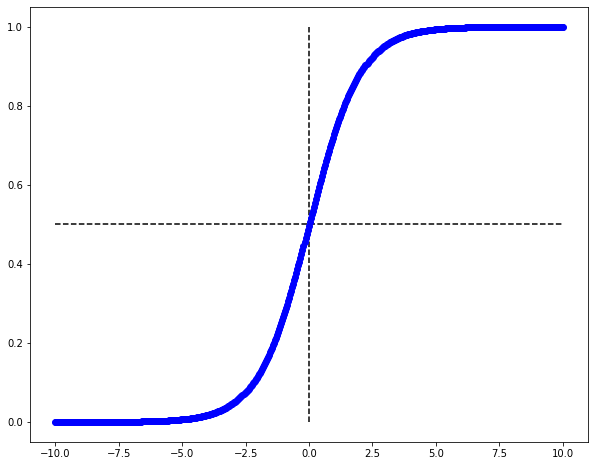

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def func_logistic(x,theta = 1): 
    return 1 / (1 + np.exp(-theta*x))

x_data = np.linspace(-10,10,500)
y_data = func_logistic(x_data)

plt.figure(figsize = (10,8))
plt.plot(x_data, y_data, 'bo')
plt.hlines(0.5, xmin = -10, xmax = 10, linestyles='dashed' )
plt.vlines(0,   ymin = 0,   ymax = 1,  linestyles='dashed' )
plt.show()

$X$값이 양(+)의 방향으로 커질 수록 $Y$값이 1에 가까워지고 <br>
$X$값이 음(-)의 방향으로 커질 수록 $Y$값이 0에 가까워진다.

따라서 $0 \leq \sigma \leq 1$ 이다.

### The Origin of Logistic function

::: 참고 ::: <br>
https://mazdah.tistory.com/769<br>
https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/

<span style="color:red"> <b>그런데 이 Logistic function은 어떻게 만들어졌을까?</b></span>

일단 우리는 회귀에서 사용한 모델($\beta^{T} X$)을 종속변수 Y가 범주형인 분류 문제에 적용하는 중이다.

하지만 연속형 자료를 예측하는 것과는 다르게 범주형 자료는 분류를 잘 맞추었는가의 문제이기 때문에 확률적인 개념이다.<br>
<i>"독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법", 위키피디아</i>

이 경우 다음과 같은 식을 구현하려는 것으로 볼 수 있다.

$ P(x) = \beta^{T} X$

하지만 회귀에서 사용한 모델의 경우 결과값의 범위가 음의 무한대에서 양의 무한대이다.<br>
반면 확률에서는 결과값의 범위가 0 이상 1 이하이다.

따라서 결과값의 범위가 일치하도록 식을 조정할 필요가 있다.

그래서 Probability랑 비슷하지만 조금 다른 Odds를 $P(x)$로 표현한다.

다만, Odds에서는 결과 값의 범위가 0에서 양의 무한대이다.<br>
아직 범위가 음의 무한대로는 확장되지 않았다. 하지만 $\log$를 씌우는 순간 문제가 해결된다. $\log$0은 정의되지 않은(undefined) 수로서 음의 무한대를 나타낼 수 있기 때문이다.

$\ln{P(x) \over {1-P(x)}} = \beta^{T} X$

그 결과 양변의 두 식은 모두 결과 값의 범위를 \[음의 무한대 ~ 양의 무한대\]로 가지게 된다.

<span style="color:blue">개념적으로 식은 완성을 했으니...! <b>이제 P(x)가 무엇으로 나오는지 까볼 시간이다.<b> </span>

우선 P에 대한 함수로 만들어야하기 때문에 양변에 지수e를 취해주어 자연로그를 지워준다.

${P(x) \over {1-P(x)}} = e^{\beta^{T}X}$

$\rightarrow P(x) = \{1-P(x)\} * e^{\beta ^Tx} $

$\rightarrow P(x)\{ 1+ e^{\beta ^Tx} \} = e^{\beta ^Tx} $

$\rightarrow P(x) = {e^{\beta ^Tx} \over {1 + e^{\beta ^Tx}}} $

$\rightarrow P(x) = {1 \over {1 + e^{- \beta ^Tx}}} $

해당 식을 정리해주면 이렇게 Logistic function(=Sigmoid function)이 나오게 된다.

### Cost function

Sigmoid Function은 non-convex하기 때문에 Linear Regression에서 사용한 cost function을 활용하여 Gradient Descent로 접근하기에는 힘들다.

(Linear Regression의 Cost function) $\rightarrow$ $$ J(\theta)={1 \over m}\sum^{m}_{i=1}{1 \over 2}(h_\theta(x^{(i)})-y^{(i)})^2 $$

왜냐하면 Linear Regression의 cost function 그래프는 convex한 반면 Logistic Regression은 Local Minima가 존재하기 때문이다.

따라서 convex한 Cost function을 사용해야 한다.

#### Using Maximum Likelihood Estimation

그 중 MLE로 Sigmoid Function의 파라미터($\beta$)를 구하는 방법도 있다.

Logistic Regression는 Bernoulli random distribution을 따르는 모델이다.

그러므로 Logistic Regression의 종속변수는 성공(1) 또는 실패(0)에 대응하는 확률변수를 가지고 이는 0과 1사이의 값을 가진다.

Bernoulli random variable Y에 관한 Likelihood function은 다음과 같다.

$ L = \Pi_ip^{y_i}(1-p)^{1-y_i} $

따라서 Logistic Regression의 Likelihood는 다음과 같다.

$ L = \Pi_i\sigma({\beta^T}x_i)^{y_i}\{1- \sigma(\beta^Tx_i)\}^{1-y_i} $

여기서 계산을 편하게 하기 위해서 양변에 Log를 씌워준다. 즉, Log-Likelihood Function을 만들어주는 것이다.

$\ln L = \sum_iy_i\ln\{\sigma({\beta^T}x_i)\} + \sum_i(1-y_i)\ln \{1- \sigma(\beta^Tx_i)\}$

로그는 단조 증가함수이기 때문에 로그-우도 함수(log-likelihood function)를 최대로 하는 파라미터는 동시에 로그-우도 함수를 최대화하는 파라미터이다.

로그-우도 함수의 $\sigma$는 ${1 \over {1 + \exp(-\beta^Tx_i)}}$이기 때문에

$\ln L = \sum_iy_i\ln\{  {1 \over {1 + \exp(-\beta^Tx_i)}}  \} - \sum_i(1-y_i)\ln \{{ \exp(-\beta^Tx_i) \over {1 + \exp(-\beta^Tx_i)}}\}$

$\ln L$을 최대화하는 $\beta$를 찾기 위해서 $\beta$로 미분을 진행한다. (Chain Rule 사용)

${\partial \over {\partial \beta}}\ln L = \sum^{N}_{i=1}(y_i - \sigma_i(x_i,\beta))x_i$

이 값은 $\beta$에 대한 비선형 함수이기 때문에 Gradient Descent와 같은 수치적인 최적화 방법을 통해 최적의 파라미터($\beta$)를 구해야 한다.

### Decision Boundary
<i>SVM에서 다시 쓰이는 개념이다.</i>

MLE(Maximum Likelihood Estimation;최대우도추정)로 찾은 최적의 parameter($\beta$) 값을 가지고 Classification을 위한 Decision Boundary를 정할 수 있다. (MLE는 아래에서 다루도록 한다)

예를 들어 Logit Model이 $\beta_0 + \beta_1x_1 + \beta_2x_2$이고 최적화된 파라미터 값이 $\beta$ = $[-3,1,1]$일 때 다음과 같은 Decision Boundary를 갖게 된다.

$y = 1$ if $\beta^Tx=-3 + x_1 + x_2  \geq 0$

따라서 아래와 같은 그래프를 그리게 된다.

<img src="img/LR_B_01.PNG">

## Multinomial Logistic Regression

Multinomial Logistic Regression (=Softmax Regression)에서는 Normalized exponential function (= Softmax function)로 Multi Classification을 한다.

Softmax는 Binary classification을 여러 번 결합한 결과다.

다음과 같은 데이터가 주어졌다고 하자.

<img src="img/LR_M_01.PNG">

범주가 네모(A), 동그라미(B), 세모(C)로 총 3개이다.

우선 <b>One-vs-All</b>로 적용해본다.

이는 각각의 클래스(A,B,C)에 대한 Binary Logistic Regression을 훈련하여 해결한다.

One-vs-All인 이유는 A(one)와 A$^c$(all)에 대한 Binary Classification을 진행하기 때문이다.

따라서 분류를 할 때 아래와 같은 그래프를 그리게 된다.

<img src="img/LR_M_02.PNG">

이를 통해서 최적화된 파라미터를 가진 각 클래스에 대한 Binary Logisitic Regression식 $ h^{(i)}_\theta(x) = P(y=i|X;\theta), i = 1,2,3 $을 가질 수 있다.

이에 예측하려는 값의 독립변수(x)를 각각의 $h_\theta(x)$에 집어넣어서 가장 큰 확률을 반환하는 식의 클래스($\max_ih_\theta^{(i)}(x)$)를 선택하면 된다.

이 때 input data를 넣어 각 클래스 별 Binary Logistic Regression에서 반환된 값을 $s_k(x) k=1,2,3$이라고 하자.

<b>Softmax function</b>은 클래스 별로 반환된 값을 모두 더하여 각 클래스 별로 반환된 값을 나누어 준다.<br>
이에 대한 식은 아래에 있다.

$\hat{p}_k = {\exp(s_k(x)) \over \sum^K_{j=1}\exp(s_j(x))}$

- K는 클래스의 수
- $\hat{p}_k$는 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 K에 속할 추정된 확률

반환된 값의 총 합을 나누어주기 때문에 Softmax function을 통해서 나온 확률들의 총 합은 1이다.

반환된 값 중 가장 큰 값을 낸 클래스로 분류가 된다.

*** 다만, Softmax Regression은 한 번에 하나의 클래스만 예측을 할 수 있다. 따라서 모든 클래스의 항목이 포함된 이미지(예를 들어 배, 오렌지 등을 분류하도록 학습했으나 과일 바구니 그림이 나온 경우)는 Binary Logistic Regression을 여러 개 사용해야 한다.

#### Cost function

Softmax Regression의 Cross Entropy cost function을 최소화하는 것으로 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제할 수 있다.

Cross Entropy의 식은 아래와 같다.

$$ J(\Theta) = -{1 \over m}\sum^m_{i=1}\sum^K_{k=1}y^{(i)}_k\log(\hat{p}^{(i)}_k) $$


* $i$번째 샘플에 대한 타깃 클래스가 k일 때 $y^{(i)}_k$가 1이고, 그 외에는 0이다.

따라서 클래스가 두 개 뿐 일 때에는 Binary Logistic Regression의 cost function과 같아진다.

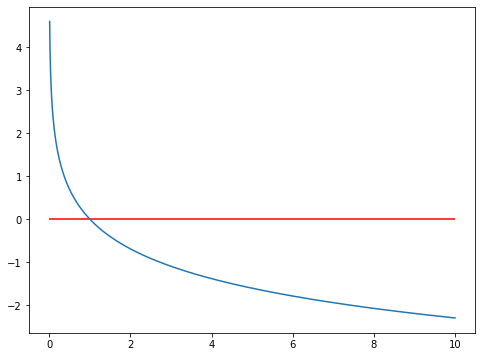

In [27]:
data_x = np.linspace(0,10,1000)
data_y = -(np.log(data_x))

plt.figure(figsize=(8,6))
plt.plot(data_x, data_y)
plt.hlines(0, xmin = 0, xmax = 10, colors='r')
plt.show()

<img src="img/LR_M_04.PNG">



이후 파라미터($\theta$)에 대한 미분을 한 식을 최소화하는 값을 Gradient Descent로 찾아내면 Cost function을 최소화할 수 있다.

# 참고 노트

### 승산(odds)

- 성공 확률을 p로 정의할 때, 실패 대비 성공할 확률의 비율 (두 확률의 비율)


$ Odd = {p \over 1-p} $

$ p = 1 \rightarrow odd = \infty $ <br>
$ p = 0 \rightarrow odd = 0 $<br>

예시)<br>
프랑스의 우승 odds는 2/11<br>
프랑스의 우승 확률은 2/(2+11) = 2/13 = 0.15(15%)

### $\beta_1$의 해석
로지스틱 회귀모델의 $\beta_1$ 해석을 용이하게 하기 위하여 Odd 개념을 사용한다.

여기서 $ \pi $는 로지스틱 회귀모델의 확률을 의미한다.<br>

$ \pi(X = x) = {1\over1+e^{-(\beta_0+\beta_1x)}} \hspace{1cm} 0 \leq \pi(X = x) \leq 1 $ <br><br>


따라서 이 경우 Odds는 <b> 범주 0에 속할 확률 대비 범주 1에 속할 확률</b>이다.

$ Odds = {{\pi(X = x)} \over {1-\pi(X = x)}} $ <br><br>


<span style='color:blue'><b>Logit Transform (로짓 변환)</b></span><br>

$ log(Odds) = log\Big({{\pi(X = x)} \over {1-\pi(X = x)}}\Big) = log\bigg({{{{1\over1+e^{-(\beta_0+\beta_1x)}}}} \over {1 - {1\over1+e^{-(\beta_0+\beta_1x)}}}}\bigg) = \beta_0 + \beta_1x$ 

그래서 $\beta_1$은 x가 한 단위 증가했을 때 log(odds)의 증가량으로 볼 수 있다.

성공 확률 $\pi(x)$에 따른 $log(Odds)$는 다음과 같다. <br>
$\pi(x)\rightarrow1,\hspace{1cm} log(Odds)\rightarrow\infty$<br>
$\pi(x)\rightarrow0.5, \hspace{1cm}log(Odds)\rightarrow0$<br>
$\pi(x)\rightarrow0, \hspace{1cm}log(Odds)\rightarrow-\infty$<br>



### 파라미터 추정

####  로지스틱 회귀모델 학습 \#1: 최대우도추정법(Maximum Likelihood Estimation)
(로지스틱 회귀모델의 파라미터는 $\beta$ 값들이다)

로지스틱 회귀모델은 이진 분류이기 때문에 베르누이 확률 함수로 볼 수 있다.

베르누이 확률 함수는 다음과 같다.<br>
$f_i(y_i) = \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i}, i=1,2,\dots,n$

정의한 베르누이 확률함수에 대한 Likelihood 함수는 다음과 같다. 
<br>
$$L = \prod_{i}f_i(y_i) = \prod_{i}\pi(x_i)^{y_i}{(1-\pi(x_i))}^{1-yi}$$

로그를 취해서 보기 편하게 한다. (로그-우도함수 log-likelihood function)<br>
$ lnL = ln \Bigg[ \prod_{i}\pi(x_i)^{y_i}{(1-\pi(x_i))}^{1-yi}   \Bigg]$ <br>
$ = ln\prod_{i}\bigg[  {\pi(x_i) \over {1-\pi(x_i)}} \bigg]^{y_i} + \Sigma_iln(1-\pi(x_i))$<br>
$ = \Sigma_iy_i(\beta_0 + \beta_1X_1 + \dots + \beta_pX_p) + \Sigma_iln(1 + e^{\beta_0 + \beta_1X_1 + \dots + \beta_pX_p}) $

...이를 통해 <br>
- 로그-우도함수가 최대가 되는 파라미터 $\beta$ 결정
- 로그-우도함수는 파라미터 $\beta$에 대해 비선형이므로 선형회귀 모델과 같이 명시적인 해가 존재하지 않는다.
- iterative reweight least square, Conjugate gradient, Newtons's method 등의 수치 최적화 알고리즘을 이용하여 해를 구한다.

#### 로지스틱 회귀모델 학습 \#2: Cross entropy

- Cross entropy: 두 확률 분포 (p(x),q(x))의 차이<br>
Cross entropy = - $\Sigma$ p(x) log q(x)


- Cross entropy: 음의 log likelihood fuction의 기대값 
<br>

- Log likelihood function을 최대 = 입력 분포 p(x)와 파라미터가 주어졌을 때, 출력 분포 q(x)의 확률을 최대
<br>

- Cross entropy를 최소 = 입력 분포 p(x)와 출력 분포q(x)의 차이를 최소
<br>

- Log likelihood function을 최대 = cross entropy를 최소 (결국 두 방법의 답은 같게 나온다!)

### 이진 분류를 위한 기준값(threshold) 설정

- 일반적으로 0.5 사용

- 예측하려는 대상에 따라서 기준값을 다르게 설정. <br> 
예를 들어... 불량 예측, 희귀환자 예측, 사기카드 예측 ... 처럼 성공 범주의 비중이 낮을 때에는 기준값을 낮게 설정한다.

### 결과 및 해석

(1) 선형회귀모델 :: 입력변수가 1단위 증가할 때 출력변수의 변화량<br>
(2) 로지스틱회귀모델 :: 입력변수가 1단위 증가할 때 로그아드의 변화량

#### 승산 비율: Odds Ratio

- 나머지 입력변수는 모두 고정시킨 상태에서 한 변수를 1단위 증가시켰을 때 변화하는 Odds의 비율

$$ {{odds(x_1 + 1, x_2, \dots, x_n)} \over {odds(x_1,x_2,\dots,x_n)}} = e^(\beta_1) $$

- $x_i$이 1단위 증가하면 성공에 대한 승산 비율이 $e^{\beta_1}$만큼 변화함

- 회귀 계수가 양수 $\rightarrow$ 성공확률 증가 (성공확률 >= 1)

- 회귀 계수가 음수 $\rightarrow$ 성공확률 감수 (0 <= 성공확률 < 1)

## Scikit-Learn을 이용한 데이터 분석

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import operator
import statsmodels.api as sm 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/german_credit.csv')

In [3]:
df.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [20]:
df.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [5]:
nominal_col = df.dtypes[df.dtypes == 'object'].index.tolist()
nominal_col

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [6]:
df_bin = df.drop(nominal_col, axis = 1)

In [7]:
df_bin.head(3)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2


In [8]:
for c in nominal_col:
    tmp_df = pd.get_dummies(df[c])
    tmp_df.columns = [c+'_'+d for d in tmp_df.columns]
    df_bin = pd.merge(df_bin, tmp_df, left_index=True, right_index=True, how= 'left')
    print("{} is merged.".format(c))

account_check_status is merged.
credit_history is merged.
purpose is merged.
savings is merged.
present_emp_since is merged.
personal_status_sex is merged.
other_debtors is merged.
property is merged.
other_installment_plans is merged.
housing is merged.
job is merged.
telephone is merged.
foreign_worker is merged.


In [9]:
df_bin.head(3)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df_bin[df_bin.columns[1:]], df_bin[df_bin.columns[0]], test_size=0.33, random_state=42)

In [12]:
model_lr = LogisticRegression(max_iter = 2000, random_state = 42)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<b>참고 ::: Recall & Precision</b>

<img src="img/LR_M_03.PNG">

In [17]:
# train_data
result_predict_train = model_lr.predict(X_train)

print("Model Result ::: accuracy_score = {}, recall_score = {}, precision_score = {}".format(accuracy_score(y_train,result_predict_train),
                                                                                            recall_score(y_train,result_predict_train),
                                                                                            precision_score(y_train,result_predict_train)))


Model Result ::: accuracy_score = 0.7880597014925373, recall_score = 0.5125628140703518, precision_score = 0.6938775510204082


In [19]:
# test_data
result_predict_test = model_lr.predict(X_test)

print("Model Result ::: accuracy_score = {}, recall_score = {}, precision_score = {}".format(accuracy_score(y_test,result_predict_test),
                                                                                            recall_score(y_test,result_predict_test),
                                                                                            precision_score(y_test,result_predict_test)))


Model Result ::: accuracy_score = 0.7666666666666667, recall_score = 0.46534653465346537, precision_score = 0.6714285714285714


In [181]:
sorted_data = sorted(dict(zip(list(df_bin.columns)[1:],model_lr.coef_[0])).items(), key=operator.itemgetter(1))

#### Coefficient (로지스틱 회귀계수, 추정된 파라미터 값)
- 해당 변수가 1단위 증가할 때 로그아드의 변화량
- 양수이면 성공확률과 양의 상관관계, 음수이면 성공 확률과 음의 상관관계

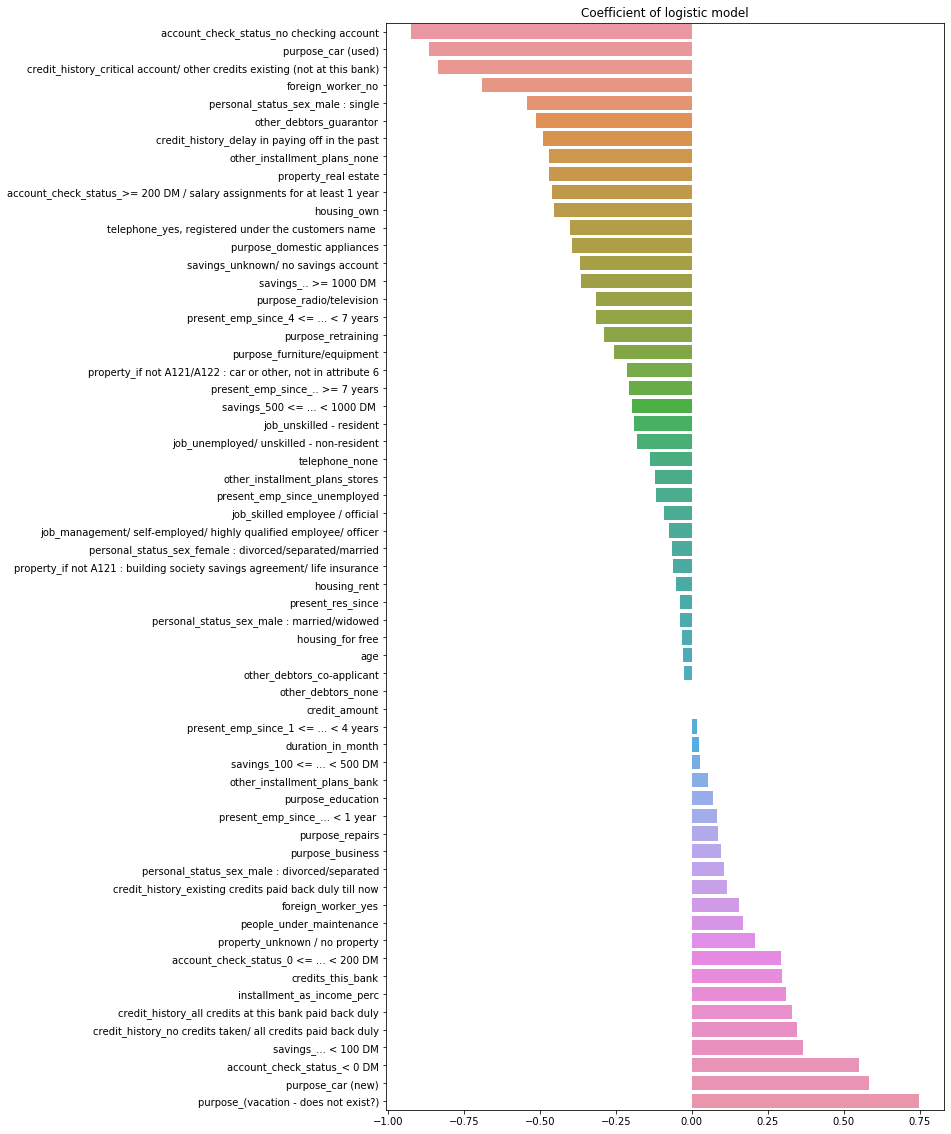

In [185]:
plt.figure(figsize=(10,20))
sns.barplot(y = [i[0] for i in sorted_data], x = [i[1] for i in sorted_data])
plt.title('Coefficient of logistic model')
plt.show()

#### Std. Error (추정 파라미터의 표준편차)
- 추정 파라미터의 신뢰구간 (구간추정)을 구축할 때 사용

#### p-value
- 해당 변수가 통계적으로 유의미한지 여부를 알려주는 지표
- 해당 파라미터 값이 0인지 여부를 통계적으로 판단 (가설검정)

#### Odds (Odds ratio)
- 나머지 입력변수는 모두 고정시킨 상태에서 한 변수를 1단위 증가시켰을 때 변화하는 Odds(성공확률)의 비율
- Experience = 1.058 $\rightarrow$ 경험이 1년 더 많으면 대출 확률이 1.058배 증가

In [189]:
logit_mod = sm.Logit(df_bin[df_bin.columns[0]], df_bin[df_bin.columns[1:]])
logit_res = logit_mod.fit(disp=0)
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      951
Method:                           MLE   Df Model:                           48
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                  0.2668
Time:                        19:46:00   Log-Likelihood:                -447.91
converged:                      False   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 5.755e-43
==============================================================================================================================================
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
duration_in_month                                                              0.0279      0.009      2.997      0.003       0.010       0.046
credit_amount                                                                  0.0001   4.44e-05      2.887      0.004    4.12e-05       0.000
installment_as_income_perc                                                     0.3301      0.088      3.739      0.000       0.157       0.503
present_res_since                                                              0.0048      0.086      0.055      0.956      -0.165       0.174
age                                                                           -0.0145      0.009     -1.576      0.115      -0.033       0.004
credits_this_bank                                                              0.2721      0.190      1.436      0.151      -0.099       0.644
people_under_maintenance                                                       0.2647      0.249      1.062      0.288      -0.224       0.753
account_check_status_0 <= ... < 200 DM                                       -14.6817   1.38e+07  -1.07e-06      1.000    -2.7e+07     2.7e+07
account_check_status_< 0 DM                                                  -14.3069   1.42e+07  -1.01e-06      1.000   -2.78e+07    2.78e+07
account_check_status_>= 200 DM / salary assignments for at least 1 year      -15.2726   1.33e+07  -1.15e-06      1.000   -2.61e+07    2.61e+07
account_check_status_no checking account                                     -16.0188   1.37e+07  -1.17e-06      1.000   -2.68e+07    2.68e+07
credit_history_all credits at this bank paid back duly                        -2.4861    3.2e+06  -7.76e-07      1.000   -6.28e+06    6.28e+06
credit_history_critical account/ other credits existing (not at this bank)    -4.0653   3.36e+06  -1.21e-06      1.000   -6.59e+06    6.59e+06
credit_history_delay in paying off in the past                                -3.4826   3.38e+06  -1.03e-06      1.000   -6.63e+06    6.63e+06
credit_history_existing credits paid back duly till now                       -3.2156   3.38e+06   -9.5e-07      1.000   -6.63e+06    6.63e+06
credit_history_no credits taken/ all credits paid back duly                   -2.6295   3.29e+06  -7.99e-07      1.000   -6.45e+06    6.45e+06
purpose_(vacation - does not exist?)                                           2.4027   1.05e+07   2.28e-07      1.000   -2.06e+07    2.06e+07
purpose_business                                                               1.6264   1.08e+07    1.5e-07      1.000   -2.12e+07    2.12e+07
purpose_car (new)                                                              2.3665   1.08e+07   2.19e-07      1.000   -2.12e+07    2.12e+07
purpose_car (used)                                                             0.7000   1.07e+0